In [ ]:
Oscar Alejandro Carrizales Tamez
2006265
Actividad:6 Red Neuronal Convolucional
Hora:N1 Grupo:007

Epoch 1/5
1875/1875 [==============================] - 54s 28ms/step - loss: 0.1301 - accuracy: 0.9601 - val_loss: 0.0484 - val_accuracy: 0.9852
Epoch 2/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0428 - accuracy: 0.9866 - val_loss: 0.0368 - val_accuracy: 0.9879
Epoch 3/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0292 - accuracy: 0.9908 - val_loss: 0.0351 - val_accuracy: 0.9888
Epoch 4/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0215 - accuracy: 0.9930 - val_loss: 0.0302 - val_accuracy: 0.9902
Epoch 5/5
313/313 [==============================] - 4s 13ms/step - loss: 0.0295 - accuracy: 0.9907
Exactitud del modelo en datos de prueba: 0.9907000064849854
1/1 [==============================] - 0s 34ms/step


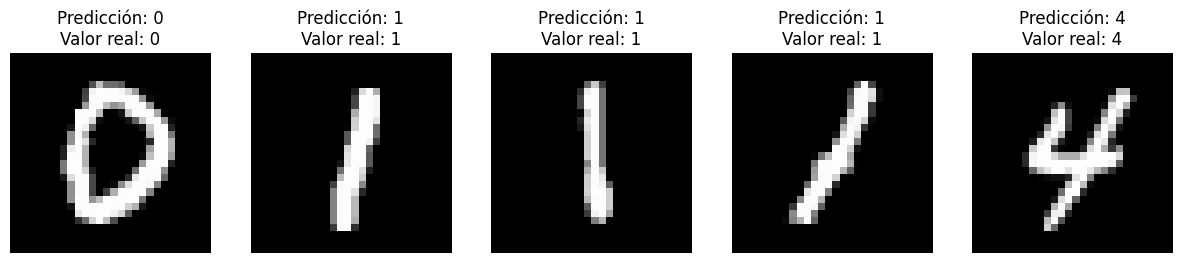

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Carga al conjunto de datos MNIST
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

# Preprocesamiento de los datos
train_data = train_data.reshape((train_data.shape[0], 28, 28, 1)).astype('float32') / 255
test_data = test_data.reshape((test_data.shape[0], 28, 28, 1)).astype('float32') / 255

# Definir la estructura de la red neuronal convolucional
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(train_data, train_labels, epochs=5, validation_data=(test_data, test_labels))

# Evaluar el modelo con los datos de prueba
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print("Exactitud del modelo en datos de prueba:", test_accuracy)
# Realizar predicciones y mostrar las imágenes
num_predicciones = 5
indices_aleatorios = np.random.choice(test_data.shape[0], num_predicciones, replace=False)
plt.figure(figsize=(15, 5))
for i, idx in enumerate(indices_aleatorios):
    plt.subplot(1, num_predicciones, i + 1)
    plt.imshow(test_data[idx].reshape(28, 28), cmap='gray')
    plt.axis('off')
    # Realizar la predicción
    prediction = model.predict(np.expand_dims(test_data[idx], axis=0))
    predicted_label = np.argmax(prediction)
    actual_label = test_labels[idx]
    plt.title(f"Predicción: {predicted_label}\nValor real: {actual_label}")

plt.show()